In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import os
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [303]:
# Titanic eğitim verisinin okunması
train_df = pd.read_csv("/content/train.csv")

In [304]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [305]:
# Veri setindeki sütun isimlerini gösterir
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [306]:
# Sayısal sütunlar için istatistiksel özet
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [307]:
# Veri tipleri ve eksik değer bilgisi
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [308]:
# KATEGORİK DEĞİŞKENLER İÇİN BAR PLOT FONKSİYONU
def bar_plot(variable):
  var=train_df[variable]
  varValue=var.value_counts() # Değerlerin frekansları hesaplanır
  plt.figure(figsize=(9,3))
  plt.bar(varValue.index,varValue)
  plt.xticks(varValue.index,varValue.index.values)
  plt.ylabel("Frequency")
  plt.xlabel(variable)
  plt.title(variable)
  plt.show()
  print("{}:\n{}".format(variable,varValue))

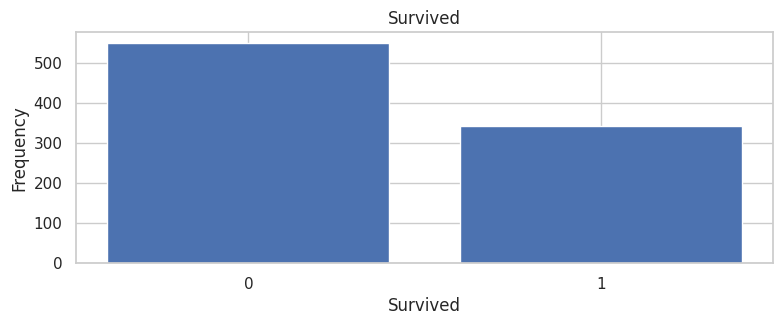

Survived:
Survived
0    549
1    342
Name: count, dtype: int64


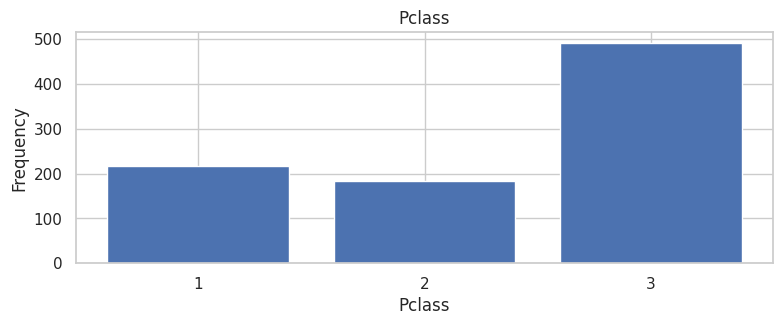

Pclass:
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


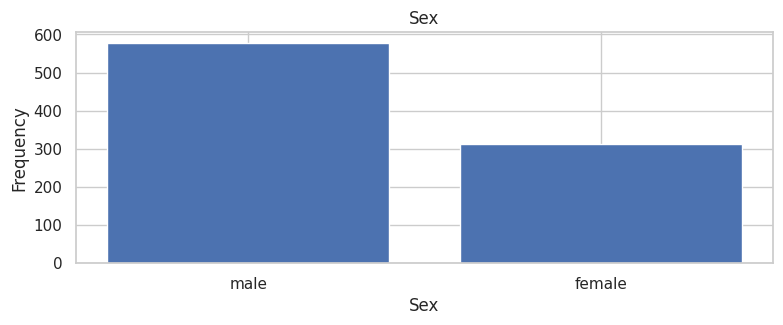

Sex:
Sex
male      577
female    314
Name: count, dtype: int64


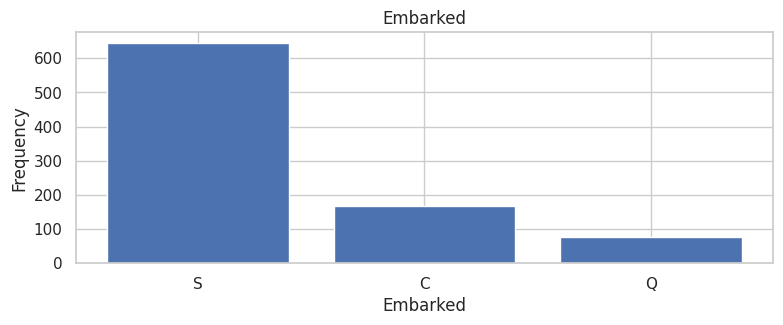

Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


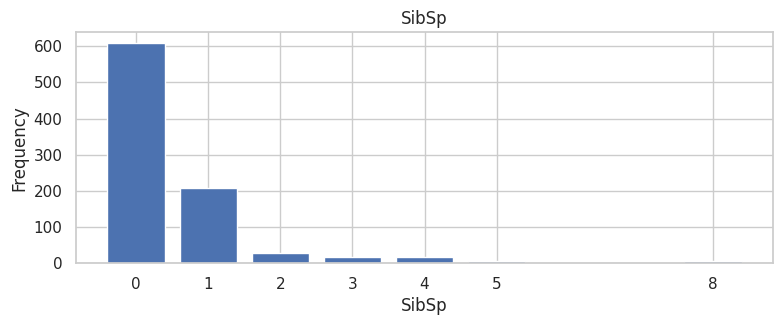

SibSp:
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


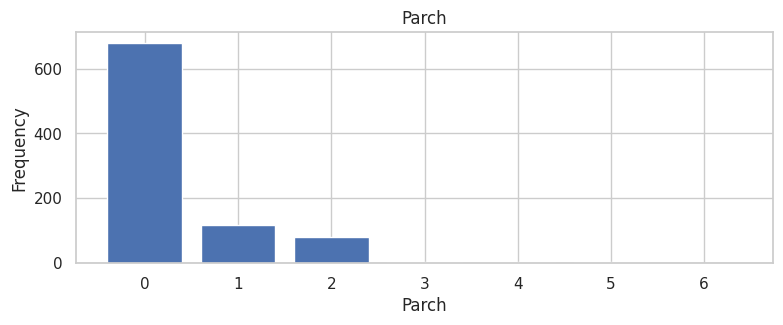

Parch:
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [309]:
# Önemli kategorik değişkenler için bar plot oluştur
category1=["Survived","Pclass","Sex","Embarked", "SibSp", "Parch"]
for c in category1:
  bar_plot(c)

In [310]:
# Çok fazla benzersiz değeri olan kategorik değişkenler için sadece değer sayımları
category2=["Cabin", "Name", "Ticket"]
for c in category2:
  print("{}\n".format(train_df[c].value_counts()))

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6


In [311]:
# SAYISAL DEĞİŞKENLER İÇİN HİSTOGRAM FONKSİYONU
def plot_hist(variable):
  plt.figure(figsize=(9,3))
  train_df[variable].hist()
  plt.xlabel(variable)
  plt.ylabel("Frequency")
  plt.title("{} distribution with hist".format(variable))
  plt.show()

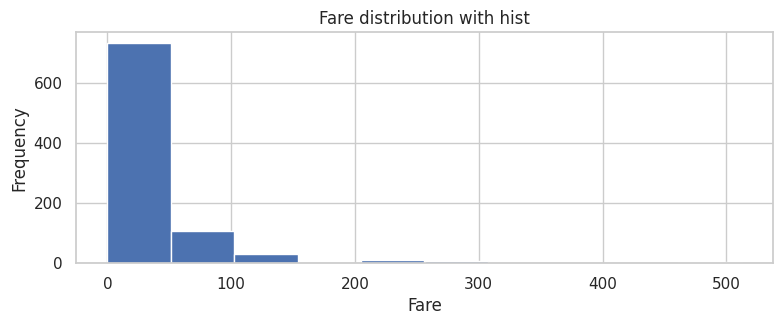

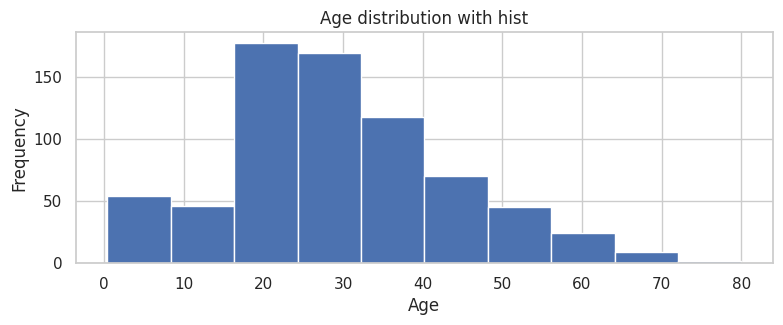

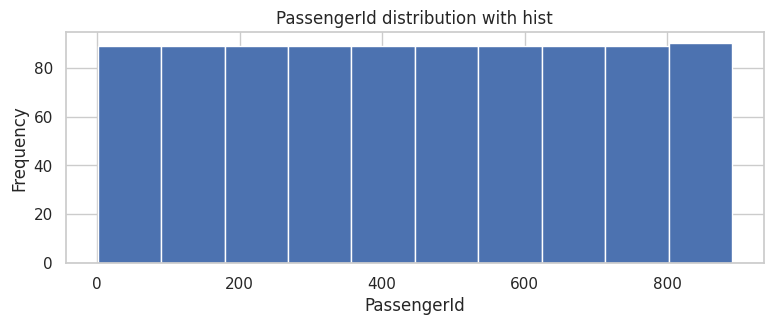

In [312]:
numericVar= ["Fare","Age","PassengerId"]
for n in numericVar:
  plot_hist(n)

In [313]:
# Yolcu sınıfına göre hayatta kalma oranları
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [314]:
# Cinsiyete göre hayatta kalma oranları
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [315]:
# Kardeş/eş sayısına göre hayatta kalma oranları
train_df[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [316]:
# Ebeveyn/çocuk sayısına göre hayatta kalma oranları
train_df[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [317]:
# IQR yöntemi ile aykırı değerleri tespit edip temizleyelim.
def detect_outliers(df,features):
  outlier_indices=[]

  for c in features:
    Q1=np.percentile(df[c],25)
    Q3=np.percentile(df[c],75)
    IQR=Q3-Q1
    outlier_step=IQR*1.5

    # Aykırı değerlere sahip satırların indekslerini bul
    outlier_list_col=df[(df[c]<Q1-outlier_step)|(df[c]>Q3+outlier_step)].index
    outlier_indices.extend(outlier_list_col)

  outlier_indices=Counter(outlier_indices)
  multiple_outliers=list(i for i, v in outlier_indices.items() if v>2)

  return multiple_outliers

In [318]:
# Aykırı değerlere sahip satırları göster
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [319]:
# Aykırı değerleri veri setinden çıkar ve indeksleri sıfırla
train_df=train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis=0).reset_index(drop=True)

In [320]:
train_df_len=len(train_df)

In [321]:
# Eksik değer içeren sütunları listele
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [322]:
# Her sütundaki eksik değer sayısı
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,170
SibSp,0
Parch,0
Ticket,0
Fare,0


In [323]:
# Embarked sütununda eksik değere sahip satırları göster
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

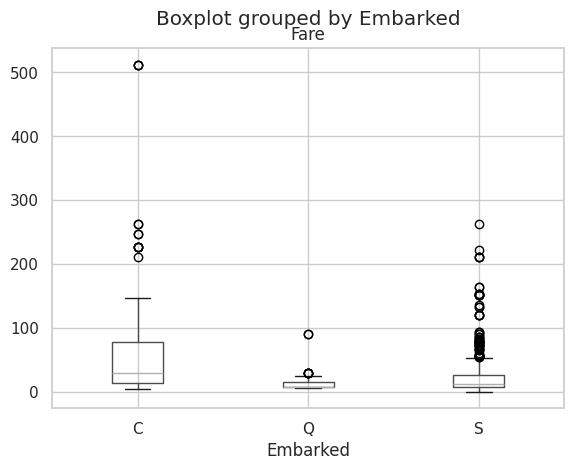

In [324]:
# Biniş limanına göre bilet fiyatı dağılımını görselleştir
train_df.boxplot(column="Fare",by="Embarked")

In [325]:
# Eksik Embarked değerlerini 'C'ile doldur- boxplota göre bu yolcuların bilet fiyatı c limanı ile uyumlu
train_df["Embarked"]=train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [326]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [327]:
# Eksik Fare değerlerini, aynı sınıftaki (Pclass=3) yolcuların ortalama fiyatı ile doldur
train_df["Fare"]=train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"]==3]["Fare"]))


In [328]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


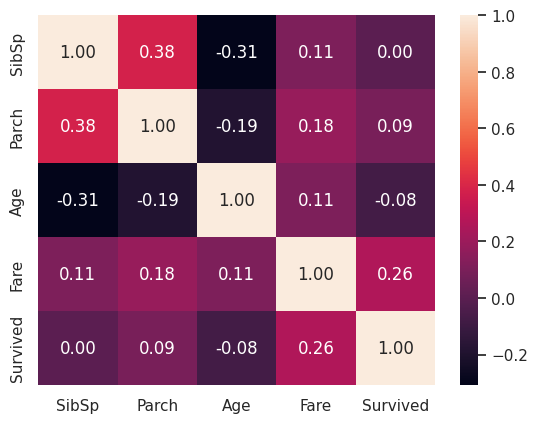

In [329]:
# Hayatta kalma ile ilişkili sayısal değişkenler arası korelasyon ısı haritası
list1= ["SibSp", "Parch", "Age", "Fare","Survived"]
sns.heatmap(train_df[list1].corr() , annot=True , fmt=".2f")
plt.show()

In [330]:
# Age sütununda eksik değere sahip satırları göster
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [331]:
# Yaş eksik değerlerini benzer özelliklere sahip yolcuların medyan yaşı ile doldur
index_nan_age=list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
  # Aynı SibSp, Parch ve Pclass değerlerine sahip yolcuların medyan yaşını hesapla
  age_pred=train_df['Age'][((train_df['SibSp'] == train_df.iloc[i]["SibSp"]) & (train_df['Parch'] == train_df.iloc[i]["Parch"]) & (train_df['Pclass'] == train_df.iloc[i]["Pclass"]))].median()

  # Genel medyan yaşı yedek olarak al
  age_med=train_df["Age"].median()

  # Eğer benzer yolcu bulunduysa onların medyanını, yoksa genel medyanı kullan
  if not np.isnan(age_pred):
    train_df["Age"].iloc[i]= age_pred
  else:
    train_df["Age"].iloc[i]= age_med


In [332]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [333]:
train_df["Name"].head(10)

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
5,"Moran, Mr. James"
6,"McCarthy, Mr. Timothy J"
7,"Palsson, Master. Gosta Leonard"
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)"
9,"Nasser, Mrs. Nicholas (Adele Achem)"


In [334]:
# İsimlerden unvan bilgisini çıkar -mr,mrs..
name=train_df["Name"]
train_df["Title"]= [i.split(".")[0].split(",")[-1].strip() for i in name]

In [335]:
train_df["Title"].head(10)

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
5,Mr
6,Mr
7,Master
8,Mrs
9,Mrs


In [336]:
# Nadir görülen unvanları "other" kategorisine dönüştür
train_df["Title"] = train_df["Title"].replace(
    ["Lady", "the Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "other")


train_df["Title"] = [
    0 if i == "Master"
    else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs"
    else 2 if i == "Mr"
    else 3
    for i in train_df["Title"]
]

train_df["Title"].head(20)


,Title
0,2
1,1
2,1
3,1
4,2
5,2
6,2
7,0
8,1
9,1


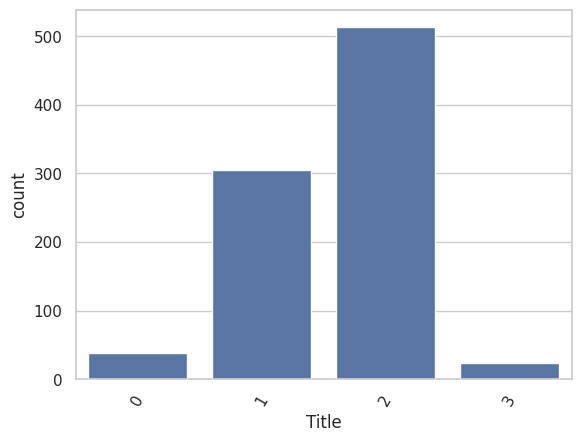

In [337]:
# Unvan dağılımını görselleştir
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

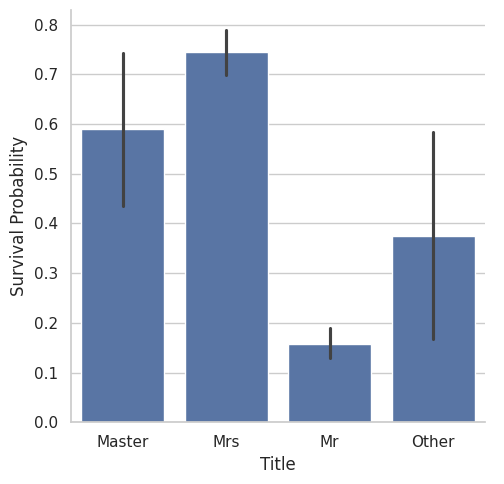

In [338]:
# Unvana göre hayatta kalma oranları
g= sns.catplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [339]:
# Name sütununu artık kullanmayacağımız için sil
train_df.drop(labels=["Name"], axis=1, inplace=True)

In [340]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [341]:
# Title sütununu one-hot encoding ile kategorik değişkenlere dönüştür
train_df = pd.get_dummies(train_df, columns=["Title"])
train_df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [342]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [343]:
# Aile büyüklüğünü hesapla: SibSp + Parch + 1 (kişinin kendisi)
train_df["Fsize"]=train_df["SibSp"]+ train_df["Parch"]+1

In [344]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


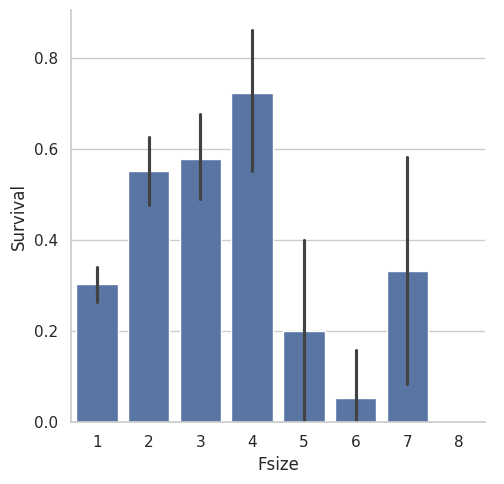

In [345]:
# Aile büyüklüğüne göre hayatta kalma oranları
g= sns.catplot(x="Fsize", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [346]:
train_df["family_size"]= [1 if i<5 else 0 for i in train_df["Fsize"]]

In [347]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0,3,male,26.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


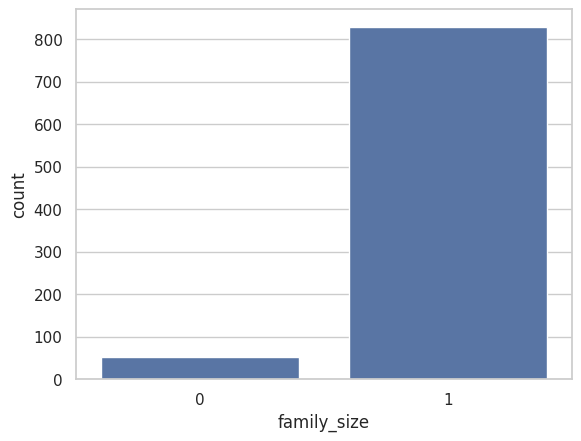

In [348]:
# Aile büyüklüğü kategorisi dağılımı
sns.countplot(x= "family_size", data=train_df)
plt.show()

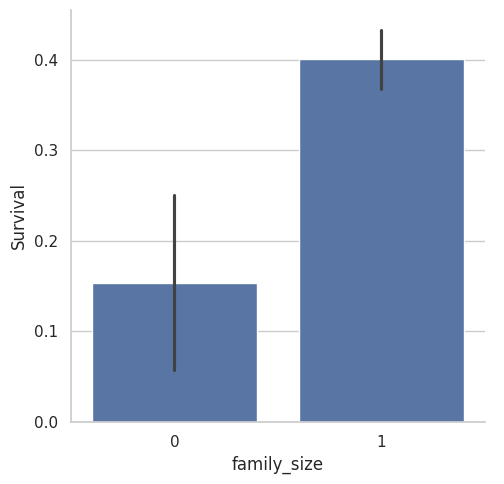

In [349]:
# Aile büyüklüğü kategorisine göre hayatta kalma oranları
g= sns.catplot(x="family_size", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [350]:
# family_size sütununu one-hot encoding ile dönüştür
train_df = pd.get_dummies(train_df, columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


In [351]:
train_df["Embarked"].head()

,Embarked
0,S
1,C
2,S
3,S
4,S


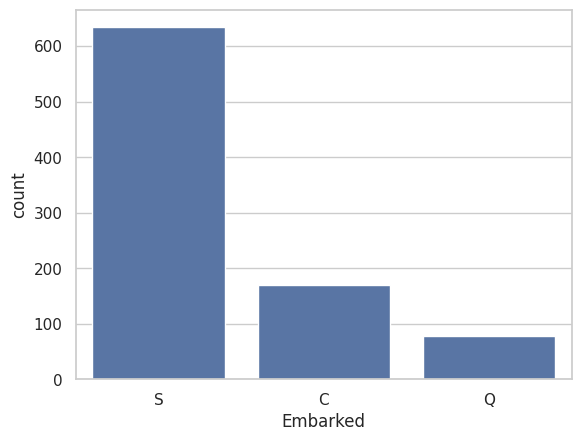

In [352]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [353]:
# Embarked sütununu one-hot encoding ile dönüştür
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [354]:
train_df["Ticket"].head(20)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
5,330877
6,17463
7,349909
8,347742
9,237736


In [355]:
tickets = []

for i in list(train_df.Ticket):
    if not i.isdigit(): # Eğer sadece rakamlardan oluşmuyorsa
        # Nokta, slash karakterlerini temizle ve ilk kelimeyi al
        tickets.append(i.replace(".", "").replace("/", "").strip().split(" ")[0])
    else:
        tickets.append("x")  # Sadece rakamlardan oluşuyorsa 'x' olarak işaretle

train_df["Ticket"] = tickets


In [356]:
train_df["Ticket"].head(20)


,Ticket
0,A5
1,PC
2,STONO2
3,x
4,x
5,x
6,x
7,x
8,x
9,x


In [357]:
# Ticket sütununu one-hot encoding ile dönüştür
train_df = pd.get_dummies(train_df, columns=["Ticket"], prefix="T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0,3,male,26.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0,1,male,54.0,0,0,51.8625,E46,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0,3,male,2.0,3,1,21.0750,NaN,True,...,False,False,False,False,False,False,False,False,False,True
8,9,1,3,female,27.0,0,2,11.1333,NaN,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1,2,female,14.0,1,0,30.0708,NaN,False,...,False,False,False,False,False,False,False,False,False,True


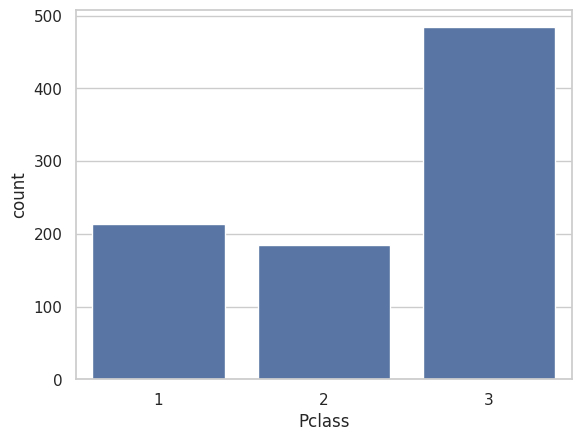

In [358]:
# Yolcu sınıfı dağılımı
sns.countplot(x="Pclass", data=train_df)
plt.show()

In [359]:
# Pclass'ı kategorik değişkene çevir ve one-hot encoding uygula
train_df["Pclass"]= train_df["Pclass"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,True,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


In [360]:
# Sex'i kategorik değişkene çevir ve one-hot encoding uygula
train_df["Sex"]= train_df["Sex"].astype("category")
train_df=pd.get_dummies(train_df,columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,False,True,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [361]:
# PassengerId ve Cabin sütunlarını veri setinden çıkar
# PassengerId: Model için bilgi taşımıyor
# Cabin: Çok fazla eksik değer var ve doldurması zor
train_df.drop(labels=["PassengerId","Cabin"], axis=1, inplace=True)

In [362]:
# Final veri setinin sütunlarını göster
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'Fsize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP',
       'T_PPP', 'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis',
       'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [363]:
train=train_df[:train_df_len]
X_train=train.drop("Survived",axis=1)
y_train=train["Survived"]

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [365]:
print(X_train.shape, X_test.shape)

(590, 50) (291, 50)


In [366]:
logrec=LogisticRegression() # Lojistik regresyon modeli oluştur
logrec.fit(X_train,y_train) # Modeli eğitim verisi ile eğit
y_pred=logrec.predict(X_test) # Test verisi üzerinde tahmin yap
print("Training",logrec.score(X_train,y_train))
print("Test",logrec.score(X_test,y_test))

Training 0.8254237288135593
Test 0.8213058419243986


In [367]:
random_state = 42

# Karşılaştırılacak sınıflandırıcılar listesi
classifier = [
    DecisionTreeClassifier(random_state=random_state),
    SVC(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    LogisticRegression(random_state=random_state),
    KNeighborsClassifier()
]

dt_param_grid = {
    "min_samples_split": range(10, 500, 20), # Düğüm bölünmesi için minimum örnek sayısı
    "max_depth": range(1, 20, 2) # Ağacın maksimum derinliği
}

svc_param_grid = {
    "kernel": ["rbf"],
    "gamma": [0.001, 0.01, 0.1, 1],  # Çekirdek katsayısı
    "C": [1, 10, 50, 100, 200, 300, 1000] # Düzenleme parametresi
}

rf_param_grid = {
    "max_features": [1, 3, 10], # Her bölünmede dikkate alınacak özellik sayısı
    "min_samples_split": [2, 3, 10], # Bölünme için minimum örnek sayısı
    "min_samples_leaf": [1, 3, 10], # Yaprak düğümünde minimum örnek sayısı
    "bootstrap": [False],
    "n_estimators": [100, 300], # Ormandaki ağaç sayısı
    "criterion": ["gini"] # Bölünme kalitesi ölçütü
}

logreg_param_grid = {
    "C": np.logspace(-3, 3, 7),
    "penalty": ["l1", "l2"]
}

knn_param_grid = {
    "n_neighbors": np.linspace(1, 19, 10, dtype=int).tolist(),   # Komşu sayısı
    "weights": ["uniform", "distance"], # Komşuların ağırlıklandırılması
    "metric": ["euclidean", "manhattan"] # Uzaklık metriği
}

classifier_param = [
    dt_param_grid,
    svc_param_grid,
    rf_param_grid,
    logreg_param_grid,
    knn_param_grid
]


In [368]:
cv_result=[] # Her modelin cross-validation sonuçlarını sakla
best_estimators=[] # Her modelin en iyi estimator'ünü sakla

# Her model için Grid Search çalıştır
for i in range(len(classifier)):
  clf=GridSearchCV(classifier[i],classifier_param[i],cv=StratifiedKFold(n_splits=10),scoring="accuracy")
  print(classifier[i])
  clf.fit(X_train,y_train)      # Modeli eğit ve en iyi parametreleri bul
  cv_result.append(clf.best_score_)  # En iyi cross-validation skorunu kaydet
  best_estimators.append(clf.best_estimator_) # En iyi estimator'ü kaydet
  print(cv_result[i])

DecisionTreeClassifier(random_state=42)
0.8355932203389831
SVC(random_state=42)
0.7966101694915253
RandomForestClassifier(random_state=42)
0.8440677966101695
LogisticRegression(random_state=42)
0.8203389830508474
KNeighborsClassifier()
0.7762711864406779


In [369]:
# Cross-validation sonuçlarını DataFrame'e dönüştür
cv_results= pd.DataFrame({"cross validation accuracy means": cv_result,"Ml models": ["decisiontree", "svm", "random","logitic","kneigh"]})
cv_results

,cross validation accuracy means,Ml models
0,0.835593,decisiontree
1,0.796610,svm
2,0.844068,random
3,0.820339,logitic
4,0.776271,kneigh


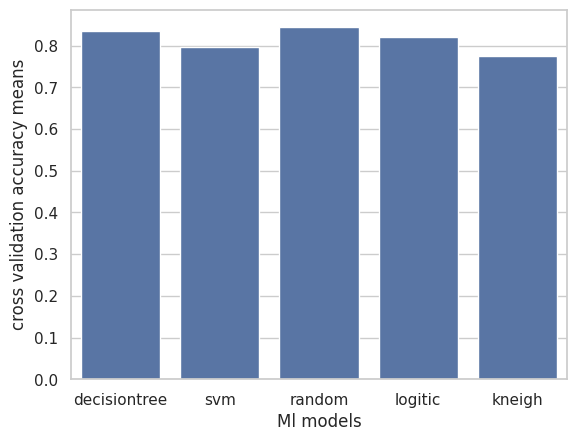

In [370]:
# Model performanslarını bar plot ile görselleştir
s = sns.barplot(data=cv_results, x="Ml models", y="cross validation accuracy means")
plt.show()

In [371]:
#Ensemble Learning--Voting Classifier
# En iyi Decision Tree, Random Forest ve Logistic Regression modellerini birleştir
votingC=VotingClassifier(
    estimators=[
        ("dt",best_estimators[0]),
        ("rf",best_estimators[2]),
        ("lr",best_estimators[3])
    ],
    voting="soft",
    n_jobs=-1
)
votingC.fit(X_train,y_train)  # Voting classifier'ı eğit
print("Test Accuracy",votingC.score(X_test,y_test))

Test Accuracy 0.8247422680412371


Sonuç   
- Aykırı değerler temizlendi
-  Eksik değerler dolduruldu
-  Yeni özellikler türetildi (Title, Fsize, family_size)
-  Kategorik değişkenler one-hot encoding ile dönüştürüldü
-  Gereksiz sütunlar çıkarıldı   
-  5 farklı makine öğrenimi modeli eğitildi
-  Her model için hiperparametre optimizasyonu yapıldı
-  Cross-validation ile model performansları değerlendirildi
-  En iyi 3 model birleştirilerek ensemble model oluşturuldu
-  Final model test seti üzerinde değerlendirildi